In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import sklearn.ensemble
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')



In [44]:
housing = pd.read_csv('./data/Ames_HousePrice_withAddress_cleaned.csv')
housing.drop(['Unnamed: 0'], axis=1, inplace=True)


In [45]:
dir(sklearn.ensemble)
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [46]:
gbm = GradientBoostingRegressor()

In [47]:
dir(gbm)

['_SUPPORTED_LOSS',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_initialized',
 '_check_params',
 '_clear_state',
 '_compute_partial_dependence_recursion',
 '_estimator_type',
 '_fit_stage',
 '_fit_stages',
 '_get_param_names',
 '_get_tags',
 '_init_state',
 '_is_initialized',
 '_make_estimator',
 '_more_tags',
 '_raw_predict',
 '_raw_predict_init',
 '_required_parameters',
 '_resize_state',
 '_staged_raw_predict',
 '_validate_estimator',
 '_validate_y',
 'alpha',
 'apply',
 'ccp_alpha',
 'criterion',
 'feature_importances_',
 'fit',
 'get_params'

In [48]:
housing.shape

(2559, 64)

In [52]:
housing.columns

Index(['GrLivArea', 'SalePrice', 'MSZoning', 'LotFrontage', 'LotArea',
       'LotShape', 'LandContour', 'LandSlope', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'GeoRefNo', 'Prop_Addr', 'lat',
       'long', 'Baths', 'Class_1.5story', 'Class_1story_dev', 'Class_2story',
       'Class_2story_dev', 'Class_duplex', 'Class_split', 'Lot_Corner',
       'Lot_CulDSac', 'Lot_FR', 'Foundation_Concrete', 'Foundation_Other',
       'price_per_s

((array([-3.45926113, -3.21273416, -3.07624957, ...,  3.07624957,
          3.21273416,  3.45926113]),
  array([ 15.37139423,  30.37205771,  33.69272237, ..., 253.03122327,
         258.73815567, 276.2508809 ])),
 (30.3240617091118, 121.0302447125453, 0.9940092628482451))

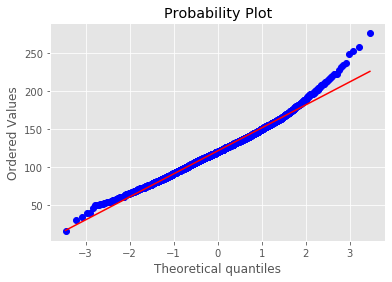

In [92]:
import scipy.stats as stats
stats.probplot(housing['price_per_sqf'], dist="norm",plot=plt)


((array([-3.45926113, -3.21273416, -3.07624957, ...,  3.07624957,
          3.21273416,  3.45926113]),
  array([2.73250826, 3.41352303, 3.51728186, ..., 5.53351289, 5.55581657,
         5.62130944])),
 (0.2609430906230549, 4.762941408864859, 0.9884977231415314))

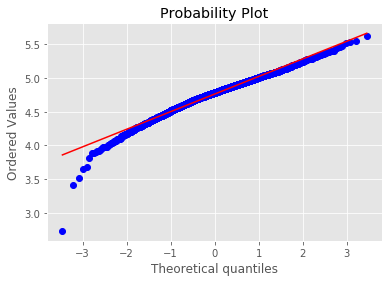

In [91]:
stats.probplot(np.log(housing['price_per_sqf']), dist="norm",plot=plt)


In [87]:
use_columns = ['GrLivArea', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
'YearBuilt', 'ExterQual', 'BsmtFinSF1', 
'TotalBsmtSF','KitchenAbvGr', 'KitchenQual','Fireplaces', 'GarageArea', 
'ScreenPorch','Class_2story_dev', 'Class_duplex','Lot_CulDSac', 'Foundation_Concrete']

y = np.log(housing['price_per_sqf'])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(housing[use_columns], y, test_size=0.8, random_state=27)

In [99]:
print(y_test)

938     4.562111
629     4.203436
1075    4.831470
1546    4.562761
1632    4.641269
          ...   
889     5.035709
453     5.047942
750     4.948092
1767    4.217358
710     4.914518
Name: price_per_sqf, Length: 2048, dtype: float64


In [94]:
gbm.set_params(verbose=1)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)

In [95]:
gbm.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.0604            0.20s
         2           0.0544            0.15s
         3           0.0489            0.13s
         4           0.0445            0.12s
         5           0.0407            0.11s
         6           0.0371            0.11s
         7           0.0344            0.11s
         8           0.0320            0.10s
         9           0.0296            0.10s
        10           0.0277            0.10s
        20           0.0156            0.08s
        30           0.0103            0.06s
        40           0.0077            0.05s
        50           0.0061            0.04s
        60           0.0052            0.03s
        70           0.0046            0.03s
        80           0.0040            0.02s
        90           0.0037            0.01s
       100           0.0035            0.00s


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)

In [96]:
gbm.score(X_train, y_train)

0.9487326134576335

In [108]:
 X_test = X_test.fillna(X_test.mean())

In [109]:
gbm.fit(X_train,y_train)
print('-'*50)
print("The train set R^2 is %.3f" %(gbm.score(X_train, y_train)))
print("The test set R^2 is %.3f" %(gbm.score(X_test,y_test)))

      Iter       Train Loss   Remaining Time 
         1           0.0604            0.10s
         2           0.0544            0.10s
         3           0.0489            0.10s
         4           0.0445            0.10s
         5           0.0407            0.09s
         6           0.0371            0.09s
         7           0.0344            0.09s
         8           0.0320            0.09s
         9           0.0296            0.09s
        10           0.0277            0.09s
        20           0.0156            0.07s
        30           0.0103            0.06s
        40           0.0077            0.05s
        50           0.0061            0.04s
        60           0.0052            0.03s
        70           0.0046            0.02s
        80           0.0040            0.02s
        90           0.0037            0.01s
       100           0.0035            0.00s
--------------------------------------------------
The train set R^2 is 0.949
The test set R^2 is 0

In [111]:
gbm.set_params(learning_rate=0.01, n_estimators=5000, max_depth=2, max_features=2, subsample=1.0, warm_start=False)
gbm.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.0673            0.00s
         2           0.0670            2.50s
         3           0.0667            1.67s
         4           0.0664            1.25s
         5           0.0662            2.00s
         6           0.0659            1.66s
         7           0.0657            2.14s
         8           0.0654            1.87s
         9           0.0651            1.66s
        10           0.0647            2.00s
        20           0.0616            1.50s
        30           0.0588            1.33s
        40           0.0559            1.37s
        50           0.0536            1.39s
        60           0.0516            1.40s
        70           0.0494            1.34s
        80           0.0475            1.35s
        90           0.0459            1.31s
       100           0.0442            1.28s
       200           0.0322            1.18s
       300           0.0253            1.11s
       40

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=2,
                          max_features=2, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=5000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=False)

In [118]:
from sklearn.metrics import r2_score
# The staged_predict returns generators

gen_train = gbm.staged_predict(X_train)
gen_test  = gbm.staged_predict(X_test)

trainR2 = []
testR2  = []
steps   = range(1,5000)
for n in steps:
    y_pred_train = next(gen_train)
    y_pred_test  = next(gen_test)
    trainR2.append(r2_score(y_pred_train, y_train))
    testR2.append(r2_score(y_pred_test, y_test))

Text(0, 0.5, '$R^2$')

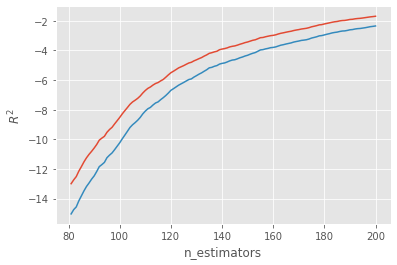

In [119]:
start = 80
end   = 200
plt.plot(steps[start:end], trainR2[start:end],label='train')
plt.plot(steps[start:end], testR2[start:end],label='test')
plt.xlabel('n_estimators')
plt.ylabel(r'$R^2$')